In [1]:
# ЯЧЕЙКА 1

# Установка пакета функций для работы с Yahoo.Finance
# Запускается один раз, в случае, если пакет не был установлен ранее
# Для корректной установки скопируйте код ниже в новую ячейку и запустите ее. Иначе, выдает SyntaxError

pip install yfinance --upgrade --no-cache-dir

SyntaxError: invalid syntax (<ipython-input-1-31059c35b9c7>, line 4)

In [1]:
# ЯЧЕЙКА 2

# Загрузка всех необходимых пакетов и библиотек
# Запускается один раз в начале работы с программой после установки пакета yfinance

%matplotlib inline
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

Введите тикер акций в формате Yahoo.Finance и период торгов для анализа в формате "ГГГГ-ММ-ДД":
Тикер акций: NILSY
Начало: 2014-01-01
Конец: 2018-12-31
[*********************100%***********************]  1 of 1 completed


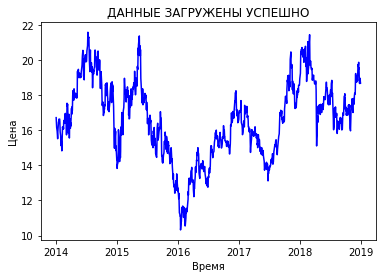

In [2]:
# ЯЧЕЙКА 3

# Выбор инструмента для торговли, временного периода , получение соотв. данных с Yahoo.Finance
# Запускается при первом исполнении программы и каждый раз, когда нужно поменять инструмент / временной период

print('Введите тикер акций в формате Yahoo.Finance и период торгов для анализа в формате "ГГГГ-ММ-ДД":')

flag = False

while flag == False:
    Data = yf.download(input('Тикер акций: '), start=input('Начало: '), end=input('Конец: ')).Close
    if Data.empty == True:
        print('')
        print('Не удалось скачать данные! Наверное, некорректный тикер или даты')
        check = input('Попробуем еще раз? (Да/Нет): ')
        if check == 'Нет':
            flag = True
    else:
        flag = True
        plt.plot(pd.DataFrame(data=Data, index=Data.index), color='Blue')
        plt.xlabel('Время')
        plt.ylabel('Цена')
        plt.title('ДАННЫЕ ЗАГРУЖЕНЫ УСПЕШНО')
        plt.show()

In [4]:
# ЯЧЕЙКА 4

# Разделение временного периода на тестовый и торговый

print('Надо разделить данные на тестовый и торговый период.')
StartDate = dt.datetime.strptime(input('Введите дату начала торгового периода в формате "ГГГГ-ММ-ДД": '),'%Y-%m-%d')
for i in range(0,len(Data)):
    if Data.index[i] >= StartDate and Data.index[i-1] < StartDate:
        StartIndex = i
TestData = Data[0:StartIndex-1]
TradeData = Data[StartIndex:len(Data)]

Надо разделить данные на тестовый и торговый период.
Введите дату начала торгового периода в формате "ГГГГ-ММ-ДД": 2015-01-01


In [5]:
# ЯЧЕЙКА 5

# Введение комиссии за сделку

Fee = float(input('Введите торговую комиссию за сделку (в долях от суммы сделки): '))

Введите торговую комиссию за сделку (в долях от суммы сделки): 0.015


In [6]:
# ЯЧЕЙКА 6

# Подбор лучшей комбинации скользящих средних на основе тестового периода
# Запускается в случае смены торгового инструмента и/или тестового периода

BestCapital = []
for i in range(0,len(TestData)):
    BestCapital.append(0)
Capitals = []
count = 0

for LMA in range(3,51):                
    for SMA in range(2,min(LMA,26)):
        Capital=[]
        for i in range(0,50):
            Capital.append(100)
        count += 1
        print('Выполнено ',round(count/(25*24+23*13)*100),'%', end='\r')
        for i in range(50,len(TestData)):
            if TestData[i-SMA:i-1].mean() > TestData[i-LMA:i-1].mean():
                Capital.append(Capital[i-1] * TestData[i-1] / TestData[i])
            elif TestData[i-SMA:i-1].mean() < TestData[i-LMA:i-1].mean():
                Capital.append(Capital[i-1] * TestData[i] / TestData[i-1])
            else:
                Capital.append(Capital[i-1])
            if (TestData[i-SMA:i-1].mean() > TestData[i-LMA:i-1].mean() and TestData[i-SMA-1:i-2].mean() < TestData[i-LMA-1:i-2].mean()) or (TestData[i-SMA:i-1].mean() < TestData[i-LMA:i-1].mean() and TestData[i-SMA-1:i-2].mean() > TestData[i-LMA-1:i-2].mean()): 
                Capital[i]=Capital[i]*(1-Fee)
        Capitals.append([LMA,SMA,Capital])
        if Capital[len(Capital)-1] > BestCapital[len(BestCapital)-1]:
            BestCapital = Capital
            BestLMA = LMA
            BestSMA = SMA

print('Выполнено 100%. Результаты анализа в следующей ячейке!')


Результаты анализа в следующей ячейке!


На основе наибольшего прироста капитала за тестовый период, рекомендуется использовать скользящие средние за  32  и  10  дн.
График цены акций и выбранных скользящих средних в тестовом периоде:


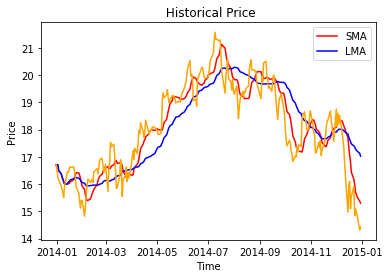

На основе наибольшей доли угаданных направлений движения цены акции, рекомендуется использовать скользящие средние за 16 и 4 дн.
Лучший процент угаданных движений составил 53.960396039603964 %.


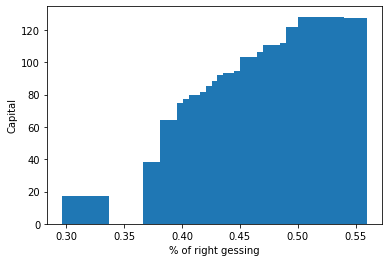

Распределение прироста капитала при разных комбинациях скользящих средних показано светло-зеленым цветом на графике ниже. Темным и ораньжевым выделены результаты наилучших комбинаций на основе наибольшего прироста капитала и на основе наибольшей доли угаданных направлений движения.


C:\Users\Admin\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


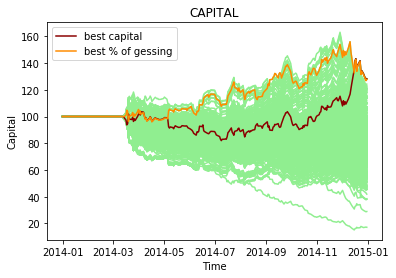

In [8]:
# ЯЧЕЙКА 7

# Вывод результатов анализа тестового периода из предыдущей ячейки

print('На основе наибольшего прироста капитала за тестовый период, рекомендуется использовать скользящие средние за ', BestLMA, ' и ', BestSMA, ' дн.')

print('График цены акций и выбранных скользящих средних в тестовом периоде:')
tShortMA = [TestData[0]]
tLongMA = [TestData[0]]
for i in range(1,BestSMA-1):               
    tShortMA.append(TestData[0:i].mean())
for i in range(BestSMA-1,len(TestData)):
    tShortMA.append(TestData[i-BestSMA+1:i].mean())
for i in range(1,BestLMA-1):
    tLongMA.append(TestData[0:i].mean())
for i in range(BestLMA-1,len(TestData)):
    tLongMA.append(TestData[i-BestLMA+1:i].mean())

plt.plot(pd.DataFrame(data=tShortMA, index= TestData.index), color="red", label='SMA')
plt.plot(pd.DataFrame(data=tLongMA, index= TestData.index), color='blue',label='LMA')
plt.plot(TestData, color='orange')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(' Historical Price')
plt.legend()
plt.show()

FR=[]
TR=[]
BestCapital2=[]
br=0
for s in range(0, len(Capitals)):  
    tr=0
    fr=0    
    for i in range(50,len(TestData)):
        if Capitals[s][2][i]>Capitals[s][2][i-1]: 
            tr=tr+1
        if Capitals[s][2][i]<Capitals[s][2][i-1]: 
            fr=fr+1   
    if tr>br:
        br=tr
        BestCapital2=Capitals[s][2]
        BL=Capitals[s][0]
        BS=Capitals[s][1]
    Capitals[s].append(tr/(len(TestData)-50))
    Capitals[s].append(fr/(len(TestData)-50))
    TR.append(tr/(len(TestData)-50))
    FR.append(fr/(len(TestData)-50))

print('На основе наибольшей доли угаданных направлений движения цены акции, рекомендуется использовать скользящие средние за',  BL,'и', BS,'дн.')
print('Лучший процент угаданных движений составил',br/(len(TestData)-50)*100,'%.')

TR=[]
cap=[]
for i in range(0,len(Capitals)):
    TR.append(Capitals[i][3])
    cap.append(Capitals[i][2][len(TestData)-1])   
plt.bar(TR, cap, width=0.04 )
plt.xlabel('% of right gessing')
plt.ylabel('Capital')
plt.show()

print('Распределение прироста капитала при разных комбинациях скользящих средних показано светло-зеленым цветом на графике ниже. Темным и ораньжевым выделены результаты наилучших комбинаций на основе наибольшего прироста капитала и на основе наибольшей доли угаданных направлений движения.')
for i in range(0,len(Capitals)):
    plt.plot(pd.DataFrame(data=Capitals[i][2], index=TestData.index), color='lightgreen' )
plt.plot(pd.DataFrame(data=BestCapital, index=TestData.index), color='darkred',label='best capital')
plt.plot(pd.DataFrame(data=BestCapital2, index=TestData.index), color='darkorange', label='best % of gessing' )
plt.xlabel('Time')
plt.ylabel('Capital')
plt.title('CAPITAL')
plt.legend()
plt.show()

Введите длительность скользящих средних для использования в торговом периоде (в днях):
Длительность 1-ой скользящей средней: 16
Длительность 2-ой скользящей средней: 4


No handles with labels found to put in legend.


Результаты основного периода:


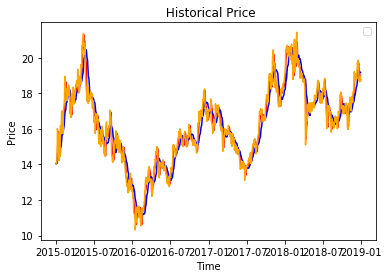

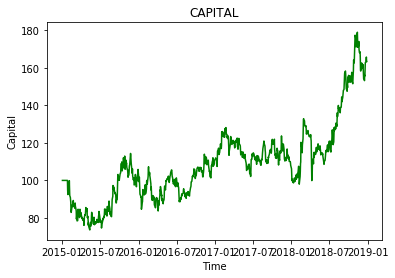

In [10]:
# ЯЧЕЙКА 8

# Торговля на торговом периоде на основе заданных параметров скользящих средних

print('Введите длительность скользящих средних для использования в торговом периоде (в днях):')
a = int(input('Длительность 1-ой скользящей средней: '))
b = int(input('Длительность 2-ой скользящей средней: '))
LMA = max(a,b)
SMA = min(a,b)

rShortMA = [TradeData[0]]
rLongMA = [TradeData[0]]
for i in range(1,SMA-1):
    rShortMA.append(TradeData[0:i].mean())
for i in range(SMA-1,len(TradeData)):
    rShortMA.append(TradeData[i-SMA+1:i].mean())
for i in range(1,LMA-1):
    rLongMA.append(TradeData[0:i].mean())
for i in range(LMA-1,len(TradeData)):
    rLongMA.append(TradeData[i-LMA+1:i].mean())

rCapital = []
for i in range(0,LMA):
    rCapital.append(100)

for i in range(LMA,len(rLongMA)):
    if rShortMA[i-1] > rLongMA[i-1]:
        rCapital.append(rCapital[i-1] * TradeData[i-1] / TradeData[i])
    elif rShortMA[i-1] < rLongMA[i-1]:
        rCapital.append(rCapital[i-1] * TradeData[i] / TradeData[i-1])
    else:
        rCapital.append(rCapital[i-1])

print('Результаты основного периода:')

rsma=pd.DataFrame(data=rShortMA, index= TradeData.index)  
rlma=pd.DataFrame(data=rLongMA, index= TradeData.index) 
plt.plot(rsma, color="red")
plt.plot(rlma, color='blue')
plt.plot(TradeData, color='orange')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title( ' Historical Price')
plt.legend()
plt.show()
rCap=pd.DataFrame(data=rCapital, index= TradeData.index)
plt.plot(rCap, color='green')
plt.xlabel('Time')
plt.ylabel('Capital')
plt.title('CAPITAL')
plt.show()